### Data Explore and Analysis

In [5]:
!head *.csv

==> course_tags.csv <==
"course_id","course_tags"
"12-principles-animation-toon-boom-harmony-1475","2d-animation"
"2d-racing-game-series-unity-5-1312","game-design"
"2d-racing-games-unity-volume-2-1286","game-art"
"2d-racing-games-unity-volume-2-1286","digital-painting"
"2d-racing-games-unity-volume-2-1286","image-editing"
"2d-racing-games-unity-volume-2-1286","art-and-design"
"2d-racing-games-unity-volume-2-1286","graphic-design"
"2d-racing-games-unity-volume-2-1286","creative-pipeline"
"2d-racing-games-unity-volume-4-1311","game-programming"

==> user_assessment_scores.csv <==
"user_handle","assessment_tag","user_assessment_date","user_assessment_score"
7487,"angular-js","2017-08-11 19:03:38",134
7487,"css","2017-08-11 20:09:56",38
7487,"html5","2017-07-31 18:59:37",84
7487,"java","2017-07-31 18:49:27",149
7487,"javascript","2017-07-31 19:05:03",92
7487,"python","2017-07-31 19:11:04",139
7407,"python","2017-08-31 11:43:15",206
3600,"c-sharp","2017-08-23 18:56:31",83
8152,"java","2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.mpl_style = 'default'

/home/renjith/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
user_course_views_df = pd.read_csv('user_course_views.csv')
print(user_course_views_df.shape)

(249238, 6)


In [10]:
user_course_views_df.head()

,user_handle,view_date,course_id,author_handle,level,view_time_seconds
0,1,2017-06-27,cpt-sp2010-web-designers-branding-intro,875,Beginner,3786
1,1,2017-06-28,cpt-sp2010-web-designers-branding-intro,875,Beginner,1098
2,1,2017-06-28,cpt-sp2010-web-designers-css,875,Intermediate,4406
3,1,2017-07-27,cpt-sp2010-web-designers-css,875,Intermediate,553
4,1,2017-09-12,aws-certified-solutions-architect-professional,281,Advanced,102


In [16]:
user_course_views_df.describe()

,user_handle,author_handle,view_time_seconds
count,249238.000000,249238.000000,249238.000000
mean,4985.923487,502.264438,1787.722522
std,2860.219099,276.860118,2208.368904
min,1.000000,1.000000,0.000000
25%,2504.000000,239.000000,294.000000
50%,4970.000000,477.000000,1009.000000
75%,7502.000000,766.000000,2452.000000
max,10000.000000,1412.000000,44410.000000


In [12]:
## Total number of users
user_course_views_df.user_handle.nunique()

8760

In [18]:
print(user_course_views_df.view_date.min())
print(user_course_views_df.view_date.max())
## So the data is of 5 Months

2017-05-01
2017-11-28


In [19]:
## How many courses are viewed
user_course_views_df.course_id.nunique()

5942

/home/renjith/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


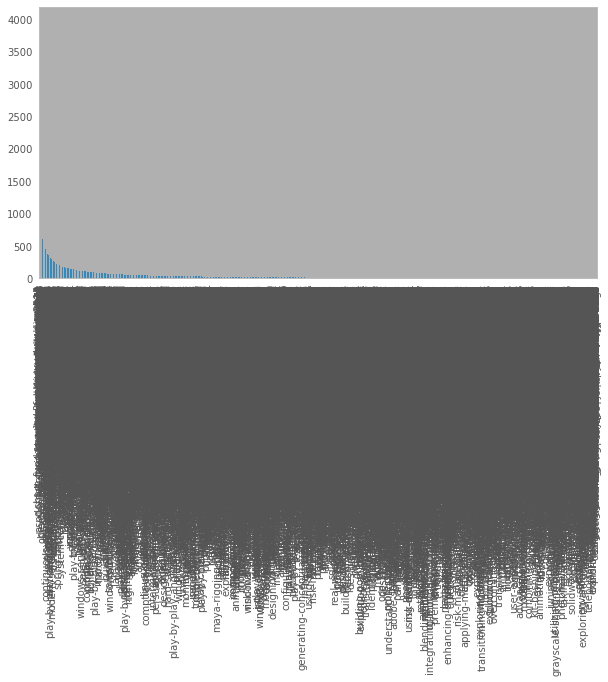

In [61]:
user_course_views_df.course_id.value_counts().plot(kind = 'bar', figsize = (10, 5))
## looks like there are some outliers. Will explore some more to find more about the outliers.


In [41]:
course_view_counts = user_course_views_df.course_id.value_counts()
course_view_counts.head()

angular-2-getting-started-update                3995
c-sharp-fundamentals-with-visual-studio-2015    3138
python-fundamentals                             2626
java-fundamentals-language                      2607
python-getting-started                          2546
Name: course_id, dtype: int64

/home/renjith/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


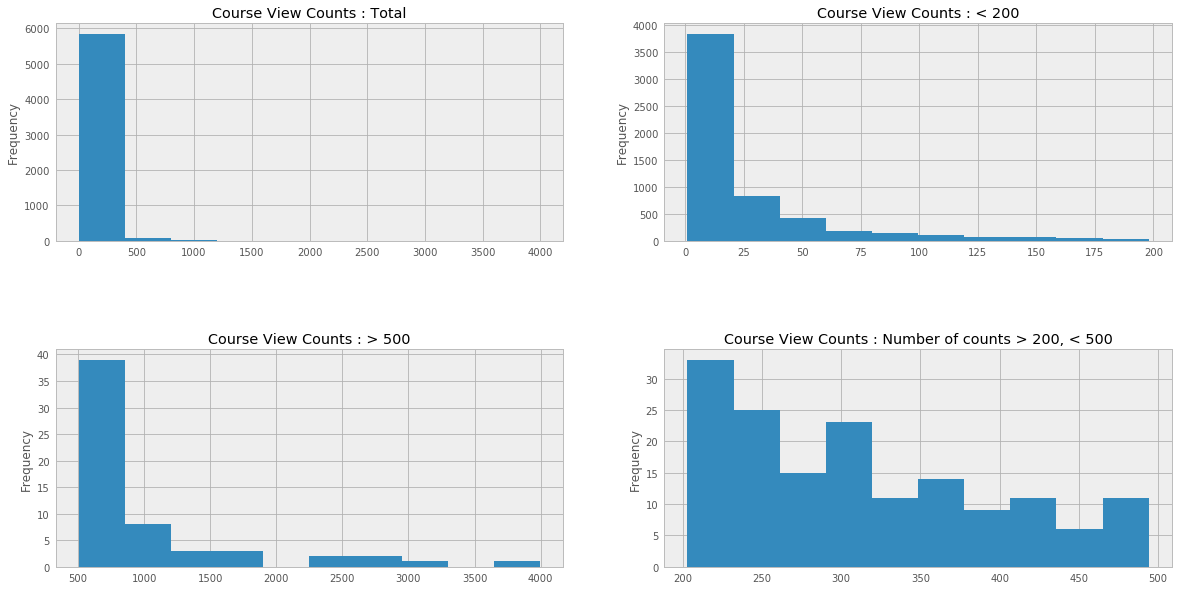

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20, 10))
## will create a hostogram and see how it looks like

course_view_counts.plot(kind = 'hist', ax = axes[0,0], title = "Course View Counts : Total")
course_view_counts[course_view_counts < 200].plot(kind = 'hist', ax = axes[0,1], title = "Course View Counts : < 200" )
course_view_counts[(course_view_counts > 200) & (course_view_counts < 500)].plot(kind = 'hist', title = "Course View Counts : Number of counts > 200, < 500" )
course_view_counts[course_view_counts > 500].plot(kind = 'hist', ax=axes[1,0], title = "Course View Counts : > 500")

In [62]:
## Exploring author_handle
user_course_views_df.author_handle.nunique()

1412

805    12841
235     7684
830     4588
434     4434
896     3917
177     3509
458     3208
681     3149
438     3146
430     3089
871     3071
501     3053
454     3052
208     2872
795     2767
131     2741
104     2670
348     2563
467     2415
56      2403
Name: author_handle, dtype: int64


/home/renjith/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


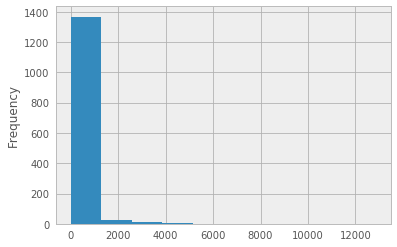

In [66]:
authorcounts = user_course_views_df.author_handle.value_counts()
print(authorcounts[:20])
authorcounts.plot(kind = 'hist')

/home/renjith/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


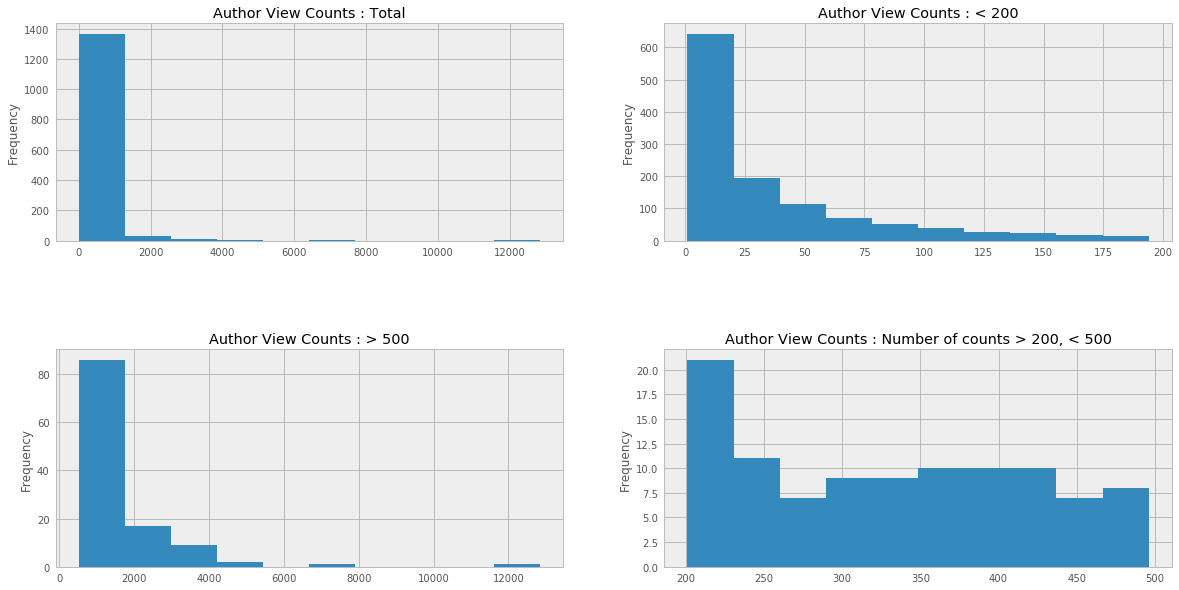

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20, 10))
authorcounts.plot(kind = 'hist', ax = axes[0,0], title = "Author View Counts : Total")
authorcounts[authorcounts < 200].plot(kind = 'hist', ax = axes[0,1], title = "Author View Counts : < 200" )
authorcounts[(authorcounts > 200) & (authorcounts < 500)].plot(kind = 'hist', title = "Author View Counts : Number of counts > 200, < 500" )
authorcounts[authorcounts > 500].plot(kind = 'hist', ax=axes[1,0], title = "Author View Counts : > 500")

Intermediate    119373
Beginner        116143
Advanced         13722
Name: level, dtype: int64


/home/renjith/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


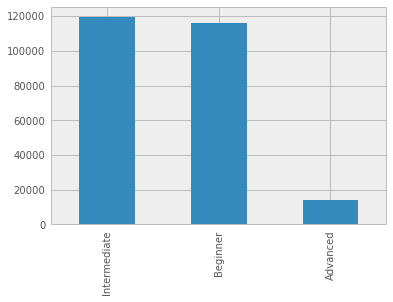

In [75]:
## exploring next feature "level"
levelcounts = user_course_views_df.level.value_counts()
print(levelcounts)
levelcounts.plot(kind = 'bar')

## Beginner and Intermediate has similar number of views, advanced has far less.

In [2]:
user_interests_df = pd.read_csv("user_interests.csv")

In [8]:
user_interests_df[user_interests_df.user_handle == 8035]

,user_handle,interest_tag,date_followed
236365,8035,python,2017-07-09 16:58:11
236366,8035,ios8,2017-07-09 16:58:11
236367,8035,ios7,2017-07-09 16:58:11
236368,8035,ios,2017-07-09 16:58:11
236369,8035,ice-cream-sandwich,2017-07-09 16:58:11
236370,8035,android,2017-07-09 16:58:11
236371,8035,javascript-frameworks,2017-07-09 16:58:11
236372,8035,javascript-libraries,2017-07-09 16:58:11
236373,8035,javascript,2017-07-09 16:58:11
236374,8035,design-patterns,2017-07-09 16:58:11


In [9]:
user_interests_df[user_interests_df.user_handle == 7200]

,user_handle,interest_tag,date_followed
211474,7200,react.js,2017-06-28 17:19:42
211475,7200,nodejs,2017-06-28 17:19:42
211476,7200,.net,2017-06-28 17:19:42
211477,7200,angular,2017-06-28 17:19:42
211478,7200,javascript-frameworks,2017-06-28 17:19:42
211479,7200,javascript-libraries,2017-06-28 17:19:42
211480,7200,javascript,2017-06-28 17:19:42
211481,7200,asp.net-core,2017-06-28 17:19:42
211482,7200,c#,2017-06-28 17:19:42
211483,7200,typescript,2017-06-28 17:19:42
